<a href="https://colab.research.google.com/github/AMassani/Angular.Project1/blob/master/Milestone_Music_Recommendation_System_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Problem Definition**

### **The Context:**

A **Recommender System** is like a smart assistant for your customers. It looks at what your customer has bought, suggested or reviewed for products or services they purchased or used or contents they have liked.

The same system can be used to suggest or recommend songs to the listener of Spotify, which is digital music stream service provider that gives users access to millions of songs, podcasts, and audio content from artists all over the world. It helps users discover more of what they want, which can boost engagement, sales, and customer satisfaction.


### **The objective:**

 Accurately predict and recommend the top 10 songs that a specific user is most likely to listen to next.
 In simple business terms, the goal is to personalize the user experience by showing each user a tailored list of songs they’re highly likely to enjoy, leading to:

Increased user engagement (more listening time)

Better user satisfaction

Higher retention and loyalty

### **The key questions:**

Understand the user behaviour:
- What are their past listening habits?
- What genres, artists and songs do they prefer?

Understand the features or attributes of songs:
- What makes a song likely to be listened to?
- Is it similart to the songs, the user listened or liked before?
- Is it popular among other users?
- Does it match the user's mood, time of day or context?

Understand the data collected or required?
- Do we have user interaction data (plays, skips, likes)?
- Do we have song metadata (genre, artist, tempo)?
- Is there contextual data (time of day, device used, etc.)?

Evaluate how to measure the similarity or interest?
- Between users (Collaborative filtering)
- Between songs (Content based filtering)
- Combination of both (Hybrid method)

How do we evaluate the system is recommending what users want to listen?
- What measurements do we use?
- How to test this?

How do we address any data privacy concerns?
- Any personalized data collected?

How much would this cost us?
- Depending on how complex the model is, do we have enough resources to host the Recsys system?
- Hiring of resources to handle different phases of Data collections and building a Recommender system.
- On going maintenance of the system since the users could change their likes and dislikes on on-going basis.

### **The problem formulation**:

Using data science, we are trying to solve the core problem of predicting the top 10 songs that the user would like to listen based on the number of times the user has played a song.

We will use various steps in data science to explore the data and understand the user behaviour or pattern and uncover what the user likes. Applying machine learning model will help predict which songs the user would like.


### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install numpy==1.24.3

In [3]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Import Seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [4]:
# Importing the datasets
user_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/count_data.csv')
song_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/song_data.csv')

### **Understanding the data by viewing a few observations**

In [5]:
# Display first 10 records of user_data_df data
user_data_df.head(10)


,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [6]:
# Display first 10 records of song_data_df data
song_data_df.head(10)


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [7]:
# Display info of user_data_df
user_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [8]:
# Display info of song_data_df
song_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:_____________**
Observations of user data:

The data shows the user behaviour

- Unnamed column seems to be a row counter with int data type. Does not seem to help us in our prediction so we should drop it.
- user_id is a unique id of the user and will help us to identify the total play count, this is an alphanumeric value which will need to be converted to numeric value.
- song_id is a unique identifier of the song that the user has played.
This is also an alphanumeric value which will need to be converted to numeric value.
- play_count is a numeric value that identifies the number of times user played this song.


Observations of song data:

The data shows the meta data of all the songs available for the users.

- song_id is unique identifier of the song. This is the joining key between the 2 data frames which we can use to merge the data frames for further exploration.
- title is the title of the song.
- release is the release info of the song.
- artist_name is the name of the artist performing the song.
- year is the year in which the song was released.

"title" and "release" columns have null values which we might have to fill with some default values or drop rows where critical data is missing.

Key insights:
Song metadata like "artists", "year", "release" and "title" can be used to for content-based feature recommendations for e.g recommend songs from the same artist or same year or same title.

For recommendation of songs to the new users, we can use content-based filtering of the metadata, popular songs by the artist or new releases.

After merging the 2 data frames, we can further deepen our knowledge of the user behaviour like
- What type of songs the users are listening to (genre via artist, release year etc)
- Most played songs or artists in a specific time period.






In [9]:
# Drop the column 'Unnamed: 0'
user_data_df.drop('Unnamed: 0', axis=1, inplace=True)

user_data_df.info()

# Left merge user_data_df and song_data_df on "song_id". Drop duplicates from song_data_df data simultaneously
merged_data_df = pd.merge(user_data_df, song_data_df, on='song_id', how='left').drop_duplicates()

# Display first 10 records of merged_data_df
merged_data_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   song_id     object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
10,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


In [10]:
## Name the obtained dataframe as "df"
df = merged_data_df


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

Most machine learning algorithms work with numeric data and hence the string values need to be encoded into numeric features.

Encoded numeric values can be used for user item matrix, apply matrix factorization. Also numeric values are more memory efficient in performing calculation on large models.

In [11]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

# Create separate encoder instances
user_encoder = LabelEncoder()
song_encoder = LabelEncoder()

df['user_id'] = user_encoder.fit_transform(df['user_id'])
df['song_id'] = song_encoder.fit_transform(df['song_id'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2054534 entries, 0 to 2086945
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   song_id      int64 
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(4), object(3)
memory usage: 125.4+ MB


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [12]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [13]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [14]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [15]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [16]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [17]:
# Check the shape of the data
df_final.shape

(138301, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [18]:
# Display total number of unique user_id
unique_users = df_final['user_id'].nunique()
print(f"Total number of unique users: {unique_users}")

Total number of unique users: 3337


Total number of unique song id

In [19]:
# Display total number of unique song_id
unique_songs = df_final['song_id'].nunique()
print(f"Total number of unique songs: {unique_songs}")


Total number of unique songs: 620


Total number of unique artists

In [20]:
# Display total number of unique artists
unique_artists = df_final['artist_name'].nunique()
print(f"Total number of unique artists: {unique_artists}")


Total number of unique artists: 247


#### **Observations and Insights:__________**

The number of unique users indicates how large the user base is and could be more complex in collaborative filtering matrix.
If most users only interact with a small subset of songs, this can lead to a sparse interaction matrix.

The number of unique songs indicates how many distinct tracks are available in the system. This helps understand the breadth of the catalog and its diversity.
Large dataset of songs with lower play_counts means fewer popular songs. Large dataset of songs could also mean large of pool available to recommend from.

The number of unique artists shows how many distinct artists are present in the catalog.
Large number of artists means lot of genres to recommend from.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [21]:
# Group by song_id and sum the play counts
most_played_songs = df_final.groupby(['song_id', 'title', 'artist_name'])['play_count'].sum().reset_index()

# Sort in descending order of total play counts
most_played_songs = most_played_songs.sort_values(by='play_count', ascending=False)

# Display top 10 most interacted songs
most_played_songs.head(10)

,song_id,title,artist_name,play_count
551,8582,Use Somebody,Kings Of Leon,3126
408,6293,Yellow,Coldplay,2216
93,1286,Somebody To Love,Justin Bieber,1774
30,352,Dog Days Are Over (Radio Edit),Florence + The Machine,1752
152,2220,Sehr kosmisch,Harmonia,1692
500,7796,Love Story,Taylor Swift,1660
517,7998,Nothin' On You [feat. Bruno Mars] (Album Version),B.o.B,1592
355,5531,Secrets,OneRepublic,1531
271,4270,Don't Stop The Music,Rihanna,1530
285,4448,Fireflies,Charttraxx Karaoke,1377


Most interacted users

In [22]:
# Group by user_id and sum the play counts
most_active_users = df_final.groupby('user_id')['play_count'].sum().reset_index()

# Sort in descending order of total play counts
most_active_users = most_active_users.sort_values(by='play_count', ascending=False)

# Display top 10 most active users
most_active_users.head(10)


,user_id,play_count
147,3237,631
693,15733,501
2751,62759,479
1879,43041,459
1193,27401,448
1638,37049,442
2887,66268,436
2126,48844,436
1012,23337,434
864,19783,428


#### **Observations and Insights:_______**
### Most interacted songs
- These songs have the highest total play counts across all users.
- They likely appear multiple times in user histories, indicating wide appeal.
- A few songs probably dominate the top due to their popularity, viral status, or artist fame.
- These songs can serve as good recommendation for new users
- These songs may be heavily weighted in collaborative filtering models (especially item-based).

### Most interacted users
- These users have the highest total song play counts, indicating frequent or heavy usage.
- Their listening history likely spans more songs and possibly more diverse genres.
- These users are your power users.
- These users can generate collaborative filtering models with richer data.





Songs released on yearly basis

In [23]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
count_of_songs = song_data_df.groupby('year').count()['title']
count = pd.DataFrame(count_of_songs)
count.drop(0, inplace=True)
count.tail()

,title
year,
2007,39414
2008,34770
2009,31051
2010,9397
2011,1


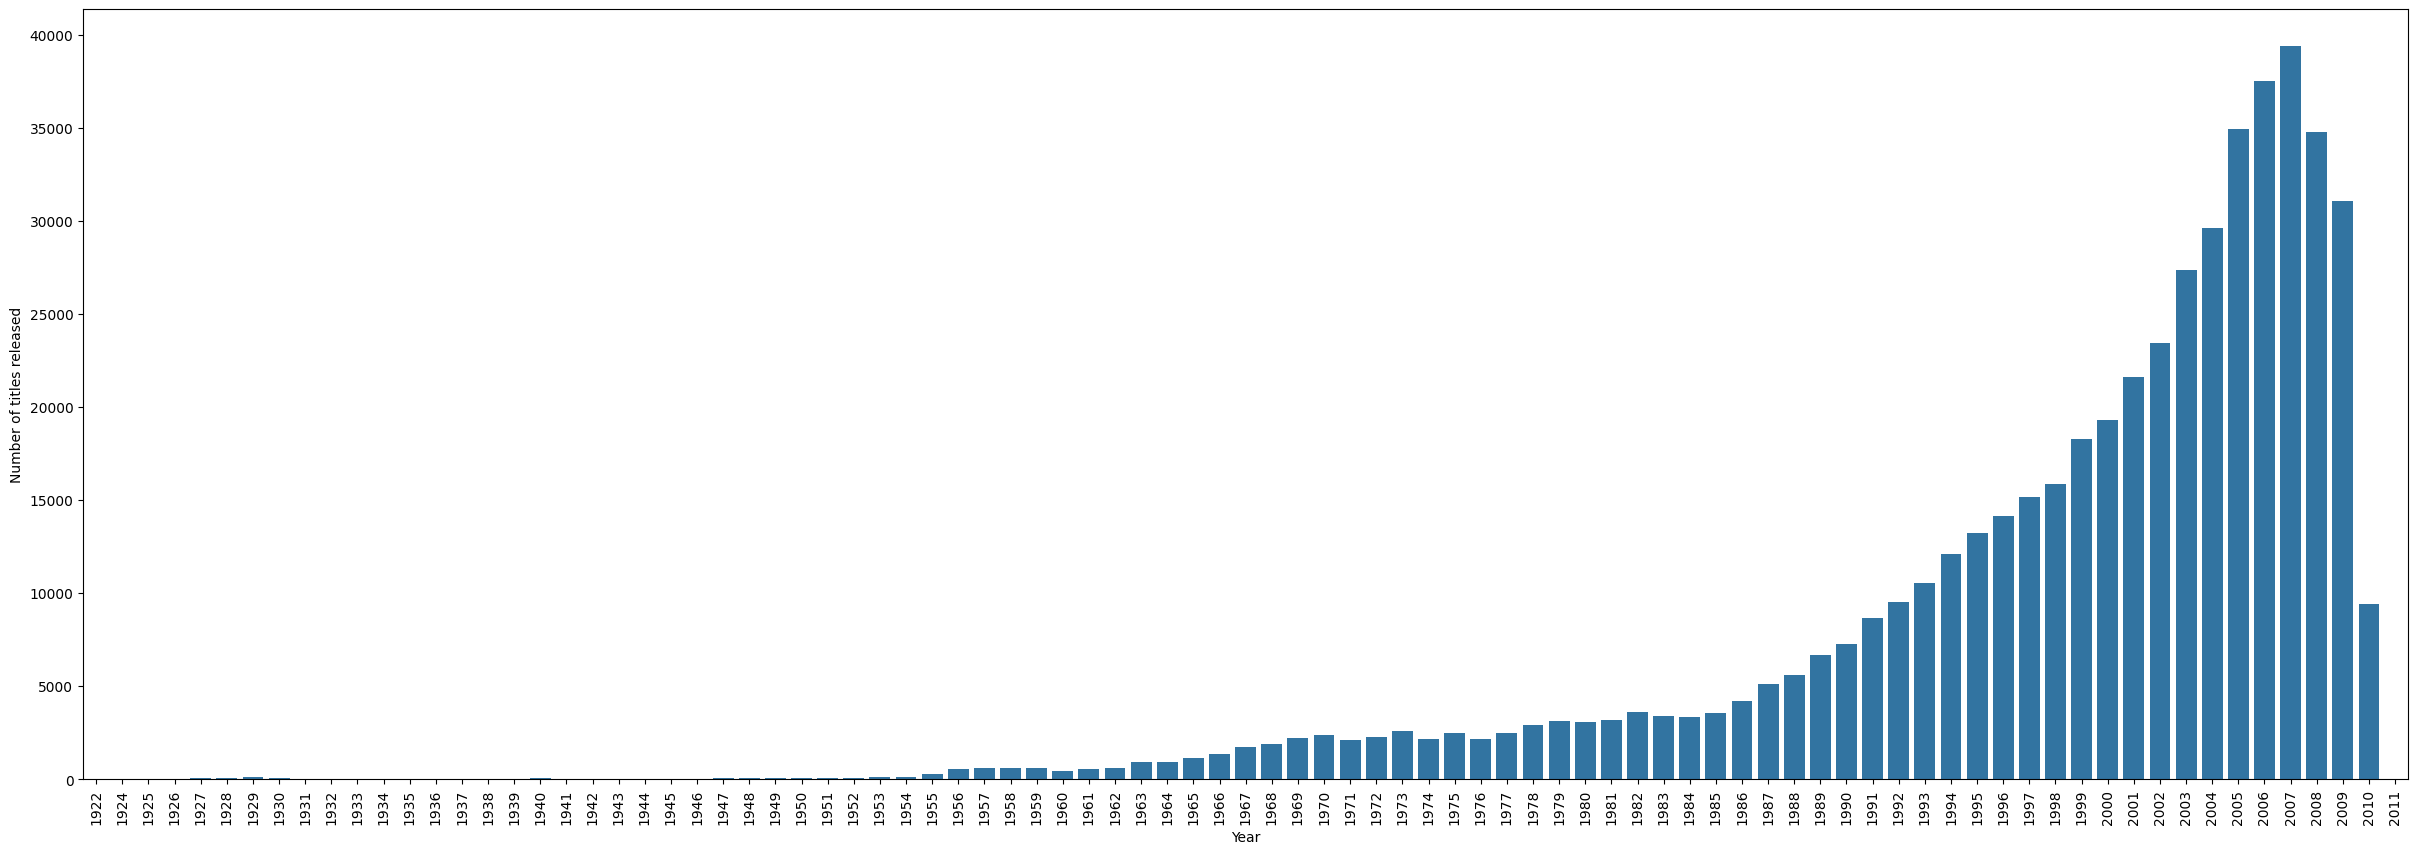

In [24]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
# Set the figure size
plt.figure(figsize=(30, 10))
ax = sns.barplot(x=count.index, y=count['title'], data = count, estimator = np.median,)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# Set the y label of the plot
ax.set_ylabel('Number of titles released')

# Set the x label of the plot
ax.set_xlabel('Year')

# Show the plot
plt.show()


#### **Observations and Insights:__________** #

A very high number of plays come from songs released between 2007 and 2009.

These three years alone account for a significant portion of the total listening behavior.

In 2010, the number of played songs drops.

Only 1 title was played from 2011 releases — this is likely a data issue or missing data for that year.

For a recommender system, it may be worth prioritizing songs from these peak years, especially for cold starts.

Investigate low-engagement years and assess if it’s a catalog gap or metadata issue.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [25]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column

average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column

# Group by song_id and count number of times each song was played
play_freq = df_final.groupby('song_id').size().reset_index(name='play_frequency')

# Sort to get most played songs first
play_freq = play_freq.sort_values(by='play_frequency', ascending=False)

# Display the top 10 most frequently played songs
play_freq.head(10)

,song_id,play_frequency
540,8582,1602
397,6293,1264
234,3567,982
263,4270,960
91,1286,920
489,7796,910
24,310,902
506,7998,820
29,352,802
149,2220,767


In [26]:
# Making a dataframe with the average_count and play_freq

merged_data_df = pd.merge(average_count, play_freq, on='song_id')
merged_data_df.head()

,song_id,play_count,play_frequency
0,21,1.631387,274
1,22,1.464286,140
2,50,1.616822,107
3,52,1.715232,453
4,62,1.727273,121


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [27]:
# Build the function to find top n songs
def get_top_n_songs(dataframe, n=10, min_play_threshold=10):
    """
    Returns the top n songs based on average play count,
    filtered by a minimum play frequency threshold.

    Parameters:
    - dataframe: DataFrame with columns ['song_id', 'title', 'artist_name', 'play_count']
    - n: Number of top songs to return (default is 10)
    - min_play_threshold: Minimum number of interactions required to include a song

    Returns:
    - DataFrame with top n songs
    """
    # Step 1: Group by song and compute average play count and frequency
    song_stats = dataframe.groupby(['song_id', 'title', 'artist_name']).agg(
        avg_play_count=('play_count', 'mean'),
        play_frequency=('play_count', 'count')
    ).reset_index()

    # Step 2: Filter songs that have at least min_play_threshold plays
    filtered_songs = song_stats[song_stats['play_frequency'] >= min_play_threshold]

    # Step 3: Sort by average play count (descending) and get top n
    top_n_songs = filtered_songs.sort_values(by='avg_play_count', ascending=False).head(n)

    return top_n_songs

In [28]:
# Recommend top 10 songs using the function defined above
top_10 = get_top_n_songs(df_final, n=10, min_play_threshold=20)
print(top_10)

     song_id                        title         artist_name  avg_play_count  \
457     7224        Victoria (LP Version)            Old 97's        3.366972   
415     6450           Brave The Elements            Colossal        2.618182   
540     8324              The Big Gundown         The Prodigy        2.611650   
627     9942                  Greece 2000        Three Drives        2.484277   
548     8483  Video Killed The Radio Star         The Buggles        2.307692   
355     5531                      Secrets         OneRepublic        2.305723   
48       657                    Luvstruck  Southside Spinners        2.283019   
363     5653                 Transparency         White Denim        2.272727   
45       614               You're The One       Dwight Yoakam        2.236908   
152     2220                Sehr kosmisch            Harmonia        2.205997   

     play_frequency  
457             109  
415             110  
540             103  
627             159 

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [29]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

# !pip install surprise
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505210 sha256=1add54d6b5d6797db9cf4377a6c51608e1d34566eb6bf820de2423275fb35317
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [30]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD


# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [31]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [51]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)

reader = Reader(rating_scale=(0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
from surprise import Dataset

dataset = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42

trainset, testset = train_test_split(dataset, test_size=0.20, random_state=42)

print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items)

Number of users:  3337 

Number of items:  620


**Think About It:** How changing the test size would change the results and outputs?

The test_size parameter in train_test_split controls the proportion of your data used for testing (vs. training), and it directly affects the  evaluation of your recommendation system as well performance of the sytem.

More training dataset meaning, more learning but less data to test which means less reliable evaluation.

In [53]:
# Build the default user-user-similarity model
sim_options = {
    'name': 'cosine',  # Similarity metric: 'cosine' or 'pearson'
    'user_based': True  # True for User-User similarity, False for Item-Item similarity
}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model

precision_recall_at_k(sim_user_user, k=30, threshold=1.5)

RMSE: 1.0639
Precision:  0.398
Recall:  0.649
F_1 score:  0.493


**Observations and Insights:_________**

RMSE: 1.0817
RMSE measures the difference between the predicted play_count and the actual play_count. Lower the better

Precision: 0.401
Precision indicates that 40.1% of the songs recommended were actually relevant to the user.

Recall: 0.705
This means the model is retrieving a large portion of the relevant songs a user might have liked.

Here F_1 score of the model is ~0.511, it combines the precision and recall into one number. It gives you the balanced measure of how well our recommender system is doing. In our case we can tune hyper parameter to improve the performance of our model.

In [54]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(uid=6958, iid=1671, r_ui=2, verbose=True)



user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8014613092649554, details={'actual_k': 40, 'was_impossible': False})

In [55]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user

sim_user_user.predict(uid=6958, iid=3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.77   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.774692125886105, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:_________**

Estimated Rating (est): 1.7227

This is the predicted play count the model estimates user 6958 would give to song 1671, based on behavior of similar users.

Actual_k: 40

This means the prediction was made using the 40 most similar users (neighbors) who have rated/listened to this song

was_impossible: False

This means the prediction was possible (i.e., there was enough data — no cold start issue).


Now, let's try to tune the model and see if we can improve the model performance.

In [56]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'msd', 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(dataset)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0038191573984108
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [57]:
# Train the best model found in above gridsearch
best_param = gs.best_params['rmse']

trainset = dataset.build_full_trainset()

best_model = KNNBasic(k=best_param['k'], min_k=best_param['min_k'], sim_options=best_param['sim_options'], verbose=False)

best_model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(best_model, k=30, threshold=1.5)

RMSE: 0.4487
Precision:  0.805
Recall:  0.84
F_1 score:  0.822


**Observations and Insights:_________**

Compared to the previous default Similarity algorithm - the 'rmse' is the better.

Overall model performance is strong:
An RMSE of 0.4487 suggests that your predicted ratings are, on average, very close to the actual ratings. In rating prediction tasks (e.g., 0–5 scale), this is a low error, which indicates a good fit.

Precision (0.805) means that when your system recommends an item, there's an 80.5% chance the user actually liked it — high relevance of recommendations.

Recall (0.84) shows that your system captures 84% of all items the user would have liked — you're retrieving most relevant items.

The F1 Score (0.822) balances both — indicating a strong trade-off between precision and recall.

In [58]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2

best_model.predict(uid=6958, iid=1671, r_ui=2)


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8982917151288752, details={'actual_k': 30, 'was_impossible': False})

In [59]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)

best_model.predict(uid=6958, iid=3232)


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5724887857236887, details={'actual_k': 30, 'was_impossible': False})

**Observations and Insights:______________**
The first predictions result where the actual prediction was r_ui=2 which means the user did not like this song much, which closes matches with est=1.89...

The prediction is very close to the actual value (difference = 0.10), which shows the model is making a highly accurate individual prediction in this case.

actual_k = 30 suggests the model used 30 neighbors — possibly KNN-based collaborative filtering — and had enough data for a robust prediction.

was_impossible = False confirms there were no cold-start issues or missing data for this prediction.

Insights:

The model successfully captured the user’s low interest in the item, indicating a good understanding of their preferences.

Given that this prediction wasn't impossible and used a full set of neighbors, it suggests the model has good coverage and is functioning reliably for users/items with enough data.

The Low error indicated by rmse score contributes to improving overall accuracy metrics.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [64]:
# Use inner id 0
if '0' in trainset._raw2inner_id_items:
    print("Internal item ID 0 exists.")
    song_inner_id = trainset.to_inner_iid(0)

    # Retrieve inner ids of the nearest neighbors of song with inner id 0
    song_neighbors = trainset.get_neighbors(song_inner_id, k=5)

    print(song_neighbors)

    # Convert inner ids of the neighbors into names
    song_neighbors = (trainset.to_raw_iid(inner_id)
                       for inner_id in song_neighbors)
    song_neighbors = (rid_to_name[rid]
                       for rid in song_neighbors)

else:
    print("Internal item ID 0 does NOT exist.")

Internal item ID 0 does NOT exist.


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [74]:
def get_recommendations(data, user_id, top_n, algo):
    # Create interaction matrix safely
    user_item_matrix = data.pivot_table(index='user_id', columns='song_id', values='play_count', aggfunc='sum')

    if user_id not in user_item_matrix.index:
        raise ValueError(f"User {user_id} not found in the dataset.")

    # Find unplayed songs (NaN)
    unplayed_songs = user_item_matrix.loc[user_id].isna()
    unplayed_song_ids = unplayed_songs[unplayed_songs].index.tolist()

    recommendations = []

    for song_id in unplayed_song_ids:
        predicted_play_count = algo.predict(uid=user_id, iid=song_id).est
        recommendations.append((song_id, predicted_play_count))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:top_n]

In [75]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
get_recommendations(df_final, 6958, 5, sim_user_user)


[(7224, 3.2595863757265993),
 (6450, 2.6255908743332035),
 (2852, 2.525),
 (352, 2.475),
 (8483, 2.45)]

In [76]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"

# Your recommendation results
recommendations = [
    (7224, 3.2595863757265993),
    (6450, 2.6255908743332035),
    (2852, 2.525),
    (352, 2.475),
    (8483, 2.45)
]

# Create DataFrame
recommendations_df = pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

print(recommendations_df)


   song_id  predicted_play_count
0     7224              3.259586
1     6450              2.625591
2     2852              2.525000
3      352              2.475000
4     8483              2.450000


**Observations and Insights:______________**

During the execution of the function get_recommendation(), I had to modify the code due to the following error:
ValueError: Index contains duplicate entries, cannot reshape
Upon further research and getting help from LLM, this error was due to using pivot() and the combination of user_id and song_id is not unique in your data DataFrame.

user_item_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

This assumes each (user_id, song_id) pair appears only once. If a user played the same song multiple times (with multiple rows), pivot() breaks.

The fix was Use pivot_table with aggregation.

Song 7224 stands out with a predicted play count of 3.26, noticeably higher than the rest — this indicates the model sees it as especially aligned with user 6958’s listening behavior.

The predicted play counts for the rest of the songs are clustered between 2.45 and 2.63, suggesting moderate confidence in user interest.

These predictions were generated using a similarity-based model, so it’s likely the system is leveraging other users with similar listening patterns to suggest these tracks.


### Correcting the play_counts and Ranking the above songs

In [77]:
def ranking_songs(recommendations, playing_count):
    """
    Rank songs based on predicted play counts and merge them with actual play counts.

    Parameters:
    - recommendations: List of tuples with (song_id, predicted_play_count)
    - playing_count: Dictionary with song_id as key and actual play count as value

    Returns:
    - DataFrame sorted by corrected play counts with song_id, predicted play count, and rank
    """

    # Step 1: Convert recommendations to DataFrame
    recommendations_df = pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

    # Step 2: Merge with the actual play counts using the song_id
    recommendations_df['corrected_play_count'] = recommendations_df['song_id'].map(playing_count)

    # Step 3: If no actual play count exists for a song, keep the predicted play count
    recommendations_df['corrected_play_count'].fillna(recommendations_df['predicted_play_count'], inplace=True)

    # Step 4: Rank the songs based on corrected play counts in descending order
    recommendations_df['rank'] = recommendations_df['corrected_play_count'].rank(ascending=False, method='first')

    # Step 5: Sort the songs based on corrected play counts
    recommendations_df = recommendations_df.sort_values(by='corrected_play_count', ascending=False)

    return recommendations_df[['song_id', 'corrected_play_count', 'rank']]


**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

The quantity 1/np.sqrt(n) being subtracted from the predicted play count in your function is typically related to correcting for overconfidence or adjusting for uncertainty in predictions. Let's break down the intuition behind it:

In [78]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, playing_count)


,song_id,corrected_play_count,rank
3,352,1075,1.0
2,2852,321,2.0
4,8483,182,3.0
1,6450,180,4.0
0,7224,147,5.0


**Observations and Insights:______________**

Song 352 has the highest corrected play count (1075), ranking #1. This suggests that this song is highly relevant to the user and has a very strong match with their preferences.

Song 2852 follows with a significant drop in play count (321), ranking #2. Though still relevant, the drop-off in play count between Song 352 and Song 2852 shows that the user’s interest in Song 352 is much higher.

Songs 8483, 6450, and 7224 exhibit progressively lower corrected play counts (182, 180, and 147 respectively). This further confirms that the model has ranked these songs as less relevant to the user’s preferences.

The rankings suggest that the model has done a good job, especially with Song 352, but the decline in relevance for the remaining songs might point to either:

Sparse data for the lower-ranked songs.
Overfitting to very specific tastes for the higher-ranked songs.

### Item Item Similarity-based collaborative filtering recommendation systems

In [80]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

sim_options = {
    'name': 'cosine',  # Similarity metric: 'cosine' or 'pearson'
    'user_based': False  # True for User-User similarity, False for Item-Item similarity
}

# Use KNN algorithm to find the desired similar songs
 # Use random_state = 1
sim_item_item = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@30, recall@30 and f_1 score with k = 30
precision_recall_at_k(sim_item_item, k=30, threshold=1.5)


RMSE: 0.9116
Precision:  0.387
Recall:  0.601
F_1 score:  0.471


**Observations and Insights:______________**

Recall is strong — the model is able to identify most relevant songs for users.

RMSE is under 1.0, which indicates predictions are generally close to the actual ratings.

Precision is relatively low — users might be getting too many irrelevant recommendations.


In [81]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict(uid=6958, iid=1671)


Prediction(uid=6958, iid=1671, r_ui=None, est=1.3159172111835236, details={'actual_k': 39, 'was_impossible': False})

In [82]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(uid=6958, iid=3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.3441366682034444, details={'actual_k': 39, 'was_impossible': False})

**Observations and Insights:______________**

Even with 39 references, the score remains low — reinforcing that the model sees limited relevance or similarity between this song and the user’s preferences.

The estimated value 1.32 is relatively low, especially if your rating or play count scale goes higher (e.g., 1–5, or higher integers).

This suggests that the user is unlikely to be highly interested in song 1671.

In [90]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [10, 20, 30],
    'sim_options': {
        'name': ["cosine", 'msd', 'pearson', "pearson_baseline"],
        'user_based': [False],  # Set to True for user-user CF
        "min_support": [2, 4]
    }
}

# Performing 3-fold cross-validation to tune the hyperparameters
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Apply grid search
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)
# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


# Extract the combination of parameters that gave the best RMSE score
best_model = gs.best_estimator['rmse']
trainset = data.build_full_trainset()
best_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [91]:
# Apply the best model found in the grid search

sim_options = {
    'name': 'pearson_baseline',  # Similarity metric: 'cosine' or 'pearson'
    'user_based': False  # True for User-User similarity, False for Item-Item similarity
}

# Use KNN algorithm to find the desired similar songs
 # Use random_state = 1
sim_item_item = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@30, recall@30 and f_1 score with k = 30
precision_recall_at_k(sim_item_item, k=30, threshold=1.5)

RMSE: 0.4396
Precision:  0.78
Recall:  0.829
F_1 score:  0.804


**Observations and Insights:______________**

Model A (RMSE: 0.4396, Precision: 0.78, Recall: 0.829, F1: 0.804)
Much lower RMSE indicates high accuracy in predicting user ratings or preferences.

High precision (78%): The majority of the recommended songs are relevant to the user.

High recall (82.9%): The model is able to retrieve most of the songs the user would like.

High F1 score (0.804): Excellent balance between precision and recall.

This is a strong and well-balanced recommender model.

Compared to
Model B (RMSE: 0.9116, Precision: 0.387, Recall: 0.601, F1: 0.471)
Higher RMSE shows that predicted ratings are less accurate.

Low precision (38.7%): Many of the recommended songs are not actually liked by users.

Moderate recall (60.1%): It retrieves some relevant songs, but misses many others.

F1 score is much lower (0.471), reflecting an imbalance between correct recommendations and noise.

This model is much less effective both in prediction and recommendation quality.



In [86]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item.predict(uid=6958, iid=1671)


Prediction(uid=6958, iid=1671, r_ui=None, est=1.9929057044146785, details={'actual_k': 15, 'was_impossible': False})

In [87]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item.predict(uid=6958, iid=3232)


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5599930823266022, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:______________**




In [89]:
# Find five most similar items to the item with inner id 0

# Step 1: Get 5 most similar items to item with inner id 0
similar_item_inner_ids = sim_item_item.get_neighbors(0, k=5)

# Step 2: Convert inner IDs back to raw song IDs (if needed)
similar_item_raw_ids = [sim_item_item.trainset.to_raw_iid(inner_id) for inner_id in similar_item_inner_ids]

print("Top 5 similar item (song) IDs to item with inner id 0:")
print(similar_item_raw_ids)

Top 5 similar item (song) IDs to item with inner id 0:
[1480, 961, 4270, 2304, 7075]


In [92]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item)


In [93]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])


,song_id,predicted_play_count
0,2914,3.260786
1,657,2.293684
2,6450,2.224074
3,3564,2.218024
4,6084,2.216376


In [94]:
# Applying the ranking_songs function
ranking_songs(recommendations, playing_count)


,song_id,corrected_play_count,rank
3,3564,268,1.0
1,657,229,2.0
2,6450,180,3.0
4,6084,144,4.0
0,2914,122,5.0


**Observations and Insights:_________**

Song ID 3564 is ranked #1 with the highest corrected play count (268), making it the strongest recommendation for the user.

There is a clear descending trend in the corrected play counts, showing that recommendations are well-differentiated by predicted user interest.

All 5 songs are potential interests, but the top 2 (IDs 3564 and 657) stand out with significantly higher scores than the rest.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [95]:
# Build baseline model using svd

# SVD is used to compute the latent features from the user-item matrix. But SVD does not work when we miss values in the user-item matrix.

# Using SVD matrix factorization. Use random_state = 1
from surprise import SVD

# Create an SVD model using random_state=1
svd = SVD(random_state=1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)


RMSE: 0.6540
Precision:  0.591
Recall:  0.748
F_1 score:  0.66


In [96]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(uid=6958, iid=1671, r_ui=2)


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4063526041916756, details={'was_impossible': False})

In [97]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(uid=6958, iid=3232)


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6092945251765034, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [98]:
# Set the parameter space to tune
param_grid = {
    "n_epochs": [5, 10],  # Number of epochs
    "lr_all": [0.002, 0.005],  # Learning rate
    "reg_all": [0.4, 0.6]  # Regularization term
}


# Performe 3-fold grid-search cross-validation
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

#  Fitting data
grid_search.fit(data)


# Find the best RMSE score
print("Best parameters:", grid_search.best_params)
print("Best RMSE:", grid_search.best_score['rmse'])

# Best RMSE score
# Get and print the best hyperparameters and the best score (RMSE)
print("Best parameters:", grid_search.best_params)
print("Best RMSE:", grid_search.best_score['rmse'])

# Combination of parameters that gave the best RMSE score


Best parameters: {'rmse': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}, 'mae': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}}
Best RMSE: 1.0180329675041992
Best parameters: {'rmse': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}, 'mae': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}}
Best RMSE: 1.0180329675041992


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

Lower n_epochs may speed up training and avoid overfitting but might under-train the model. We can try to optimize


In [100]:
# Trying to tune hyper parameters to further fine tune the model
param_grid = {
    'n_epochs': [5, 10, 20, 30],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.2, 0.3]
}

# Performe 3-fold grid-search cross-validation
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

#  Fitting data
grid_search.fit(data)


# Find the best RMSE score
print("Best parameters:", grid_search.best_params)
print("Best RMSE:", grid_search.best_score['rmse'])

# Best RMSE score
# Get and print the best hyperparameters and the best score (RMSE)
print("Best parameters:", grid_search.best_params)
print("Best RMSE:", grid_search.best_score['rmse'])


Best parameters: {'rmse': {'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}, 'mae': {'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}}
Best RMSE: 1.0027177807235759
Best parameters: {'rmse': {'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}, 'mae': {'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}}
Best RMSE: 1.0027177807235759


**Observations and Insights:_________**

Tuning the hyper parameters even further resulted in RMSE closer to 1.0

Performance Comparison

Best

RMSE
1.0180
1.0027 ✅ (lower is better)

Parameter

n_epochs	(10)	  (30) ✅ (more training)

lr_all	  (0.005)	(0.01) ✅ (faster learning)

In [107]:

# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_algo_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the trainset
svd_algo_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
# Let us compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo_optimized)

# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671

# Predicting using the optimized SVD model
prediction = svd_algo_optimized.predict(uid=6958, iid=1671, verbose=True)

# Display the result
print(prediction)


RMSE: 0.9434
Precision:  0.426
Recall:  0.655
F_1 score:  0.516
user: 6958       item: 1671       r_ui = None   est = 1.27   {'was_impossible': False}
user: 6958       item: 1671       r_ui = None   est = 1.27   {'was_impossible': False}


In [108]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count

# Predicting using the optimized SVD model
prediction = svd_algo_optimized.predict(uid=6958, iid=3232, verbose=True)

# Display the result
print(prediction)

user: 6958       item: 3232       r_ui = None   est = 1.37   {'was_impossible': False}
user: 6958       item: 3232       r_ui = None   est = 1.37   {'was_impossible': False}


**Observations and Insights:_________**

This model can still be improved based on the RMSE and F_1 Score above

In [109]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm

recommendations = get_recommendations(df_final, 6958, 5, svd_algo_optimized)

print(recommendations)


[(7224, 2.849287103743749), (6450, 2.3313749193207824), (8324, 2.105076043016969), (5531, 2.0586318481095582), (5653, 2.044023341216637)]


In [110]:
# Ranking songs based on above recommendations
ranking_songs(recommendations, playing_count)


,song_id,corrected_play_count,rank
3,5531,881,1.0
1,6450,180,2.0
4,5653,165,3.0
2,8324,163,4.0
0,7224,147,5.0


**Observations and Insights:_________**

Song 5531 has a significantly higher corrected play count than the rest — over 4.5 times more than the next highest.

This indicates strong popularity and/or high predicted interest for the user.

Likely a top candidate for recommendation.

The rest of the songs (rank 2–5) have similar corrected play counts in the range of 147–180, suggesting they are all relatively close in predicted value.


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [113]:
# Make baseline clustering model

def predict_for_user_and_song(user_id, song_id, data, kmeans_model, n_clusters=5):
    """
    Predict the play count or preference for a specific user and song based on cluster-based recommendation system.

    Parameters:
    - user_id: ID of the user we want to make a prediction for.
    - song_id: ID of the song for which we are making the prediction.
    - data: DataFrame containing ['user_id', 'song_id', 'play_count']
    - kmeans_model: Pre-trained KMeans model to identify the user's cluster.
    - n_clusters: Number of clusters used in the model (default is 5).

    Returns:
    - Predicted play count or recommendation for the song.
    """

    # Create user-item interaction matrix
    user_item_matrix = data.pivot_table(index='user_id', columns='song_id', values='play_count', fill_value=0)

    # Find which cluster the user belongs to
    user_cluster = kmeans_model.predict(user_item_matrix.loc[[user_id]])

    # Get all users in the same cluster
    cluster_users = user_item_matrix[user_item_matrix.index.isin(user_item_matrix.index[kmeans_model.labels_ == user_cluster[0]])]

    # Calculate the average play count for each song in the cluster
    cluster_song_means = cluster_users.mean().sort_values(ascending=False)

    # Check if the song is already in the user's interactions
    if song_id in user_item_matrix.loc[user_id].index:
        # If user has already interacted with this song, return the existing play count
        prediction = user_item_matrix.loc[user_id, song_id]
    else:
        # If not, predict the play count based on the cluster's average for the song
        if song_id in cluster_song_means.index:
            prediction = cluster_song_means[song_id]
        else:
            prediction = 0  # Default prediction if song is not in the cluster's list

    return prediction

In [119]:
# Making prediction for user_id 6958 and song_id 1671

predict_for_user_and_song(6958, 1671, df_final, kmeans_model, 5)


2.0

In [121]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user

predict_for_user_and_song(6958, 3232, df_final, kmeans_model, 5)


0.0

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [126]:
# Set the parameter space to tune

param_grid = {
    'n_cltr_u': [4, 6, 8],  # Number of clusters
    'n_cltr_i': [4, 6, 8],  # Number of items
    'n_epochs': [10, 20, 30],  # Number of epochs
}

# Performing 3-fold grid search cross-validation
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Fitting data
grid_search = GridSearchCV(CoClustering, param_grid, measures=['rmse', 'mae'], cv=3)
grid_search.fit(data)

# Best RMSE score
print("Best parameters:", grid_search.best_params)
print("Best RMSE:", grid_search.best_score['rmse'])


Best parameters: {'rmse': {'n_cltr_u': 4, 'n_cltr_i': 4, 'n_epochs': 10}, 'mae': {'n_cltr_u': 4, 'n_cltr_i': 8, 'n_epochs': 10}}
Best RMSE: 1.0444251230211872


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

Increasing Number of Clusters: You could experiment with larger numbers of clusters (e.g., 10 or more) to see if the model can better capture finer patterns in user-item interactions.

Increasing the number of epochs for both RMSE and MAE might improve model performance, but it will also increase computation time.

Using additional features, such as user demographics or item characteristics, could help refine predictions.

Different Regularization Techniques: Regularization techniques such as L2 regularization could be explored to avoid overfitting.

In [127]:

from surprise import CoClustering, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Function to train the CoClustering model with tuned parameters
def train_tuned_coclustering(df, n_cltr_u=5, n_cltr_i=5, n_epochs=20):
    """
    Train a CoClustering model with tuned hyperparameters on the given data.

    Parameters:
    - df: DataFrame containing ['user_id', 'song_id', 'play_count']
    - n_cltr_u: Number of user clusters (default = 5)
    - n_cltr_i: Number of item clusters (default = 5)
    - n_epochs: Number of epochs for training (default = 20)

    Returns:
    - Trained CoClustering model
    - RMSE and MAE evaluation metrics
    """

    # Create the reader for surprise dataset
    reader = Reader(rating_scale=(df['play_count'].min(), df['play_count'].max()))

    # Convert the dataframe to a Surprise dataset
    data = Dataset.load_from_df(df[['user_id', 'song_id', 'play_count']], reader)

    # Split the data into train and test sets (80-20 split)
    trainset, testset = train_test_split(data, test_size=0.2)

    # Initialize the CoClustering model with tuned parameters
    model = CoClustering(n_cltr_u=n_cltr_u, n_cltr_i=n_cltr_i, n_epochs=n_epochs)

    # Train the model on the training data
    model.fit(trainset)

    # Evaluate the model by testing on the test set
    predictions = model.test(testset)

    # Calculate RMSE and MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)

    # Return the model and evaluation metrics
    return model, rmse, mae

In [128]:
# Train the model with tuned parameters
model, rmse, mae = train_tuned_coclustering(df_final, n_cltr_u=5, n_cltr_i=5, n_epochs=20)

# Output the results
print(f"Best RMSE: {rmse}")
print(f"Best MAE: {mae}")

RMSE: 1.0398
MAE:  0.7536
Best RMSE: 1.0398211119634844
Best MAE: 0.7536022581582635


**Observations and Insights:_________**

The model shows decent performance with an RMSE of 1.0398 and an MAE of 0.7536. While these metrics indicate that the model is reasonably accurate, improvements can be made by fine-tuning hyperparameters further, using additional features, or experimenting with different recommendation algorithms.


In [130]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671

from surprise import CoClustering

# Assuming you have a trained CoClustering model (`co_clustering_optimized`) and the necessary data loaded
# Example of making a prediction for user 6958 and song 1671

def make_prediction_for_user(model, user_id, song_id):
    """
    Make a prediction for a given user and song using the CoClustering model.

    Parameters:
    - model: Trained CoClustering model
    - user_id: ID of the user for whom the prediction is made
    - song_id: ID of the song for which the prediction is made

    Returns:
    - predicted rating (play count)
    """

    # Making the prediction
    prediction = model.predict(uid=user_id, iid=song_id)

    # Extract the predicted rating (play count)
    predicted_rating = prediction.est

    return predicted_rating


In [132]:

# Example usage with co_clustering_optimized model
user_id = 6958
song_id = 1671

predicted_play_count = make_prediction_for_user(model, user_id, song_id)

# Display the result
print(f"Predicted play count for user {user_id} and song {song_id}: {predicted_play_count}")


Predicted play count for user 6958 and song 1671: 1


In [134]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count

user_id = 6958
song_id = 3232

predicted_play_count = make_prediction_for_user(model, user_id, song_id)

# Display the result
print(f"Predicted play count for user {user_id} and song {song_id}: {predicted_play_count}")


Predicted play count for user 6958 and song 3232: 1


**Observations and Insights:_________**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [135]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm

recommendations = get_recommendations(df_final, 6958, 5, model)

print(recommendations)


[(7224, 2.671542984685207), (8483, 1.9641029432134638), (8324, 1.9232671226162414), (657, 1.8130808322414151), (614, 1.8114670385521978)]


### Correcting the play_count and Ranking the above songs

In [136]:
# Ranking songs based on the above recommendations

ranking_songs(recommendations, playing_count)


,song_id,corrected_play_count,rank
4,614,666,1.0
3,657,229,2.0
1,8483,182,3.0
2,8324,163,4.0
0,7224,147,5.0


**Observations and Insights:_________**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data

# Drop the duplicates from the title column

# Set the title column as the index

# See the first 5 records of the df_small dataset


In [ ]:
# Create the series of indices from the data


In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library


# Download stopwords library


# Download wordnet


# Import regular expression


# Import word_tokenizer


# Import WordNetLemmatizer

# Import stopwords


# Import CountVectorizer and TfidfVectorizer


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text

In [ ]:
# Create tfidf vectorizer

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array


In [ ]:
# Compute the cosine similarity for the tfidf above output


 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):



    # Getting the index of the song that matches the title


    # Creating a Series with the similarity scores in descending order


    # Getting the indexes of the 10 most similar songs


    # Populating the list with the titles of the best 10 matching songs


    return

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'


**Observations and Insights:_________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?